# Naive Bayes

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from tabulate import tabulate

sys.path.append('../src') # permite importar modulos locales

In [3]:
from arff_helper import DataSet
from metrics import accuracy_score, recall_score 
from classifier import NBClassifier
from k_fold_cross_validation import k_fold_cross_validation

# Ejemplo Clase

In [4]:
ds = DataSet()
ds.load_from_arff('../datasets/dataset_clase.arff')
target_attribute='Juega'
classifier = NBClassifier(target_attribute, ds.attribute_info, ds.attribute_list)
classifier.fit (ds.pandas_df)

errors = 0
for i in range (ds.pandas_df.shape[0]):
    instance = ds.pandas_df.loc[i]
    predict_result = classifier.predict(instance)
    print(f'Real value : {instance[target_attribute]}, Predicted: {predict_result}')
    if instance[target_attribute] != predict_result:
        errors = errors + 1
print(f'Cantidad de errores: {errors}')        


Real value : NO, Predicted: NO
Real value : NO, Predicted: NO
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : NO, Predicted: YES
Real value : YES, Predicted: YES
Real value : NO, Predicted: NO
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : NO, Predicted: NO
Cantidad de errores: 1


## Evaluación del algoritmo

1. Separe 4/5 del conjunto de entrenamiento y realice una validación cruzada de tamaño 10.

2. Con el 1/5 no utilizado en la parte previa evalúe al resultado de entrenar con los 4/5 restantes.

Metricas:

    Acuracy: Se calcula la proporcion de predicciones correctas.
    Recall: Se calcula que proporción de positivos reales se identificaron correctamente.



K fold validation :

  #    Accuracy     Recal
---  ----------  --------
  1    1         1
  2    0.911111  1
  3    0.955556  1
  4    0.888889  0.8
  5    0.955556  1
  6    0.911111  0.888889
  7    0.955556  1
  8    0.955556  0.933333
  9    0.977778  0.928571
 10    0.933333  0.866667

T=1/5 S=4/5 :

Metric
--------  --------
Accuracy  0.902655
Recal     0.793103


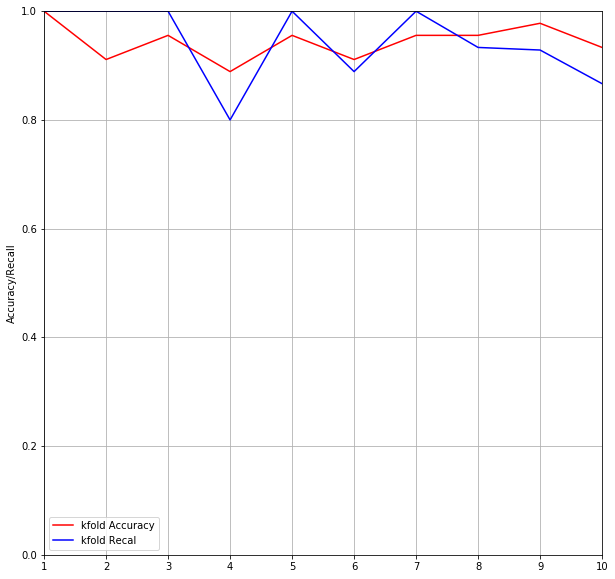

In [5]:
ds = DataSet()
ds.load_from_arff('../datasets/Autism-Adult-Training-Subset.arff')    
target_attribute = 'Class/ASD'

k_for_k_fold = 10
metrics = [accuracy_score, recall_score]

# Separo el dataset original en 4/5 y 1/5
train_pandas_df = ds.pandas_df.sample (frac=0.8)
test_pandas_df = ds.pandas_df.loc[~ds.pandas_df.index.isin (train_pandas_df.index), :]

ds_train = DataSet ()
ds_train.load_from_pandas_df (train_pandas_df, ds.attribute_info, ds.attribute_list)

# Instancio clasificador nb para realizar la validacion
classifier = NBClassifier (target_attribute, ds.attribute_info, ds.attribute_list)

# Con los 4/5 se realiza una validación cruzada de tamaño 10, usando distintas metricas
metrics_result_kfold = k_fold_cross_validation(ds_train, target_attribute, k_for_k_fold, classifier, metrics)

#Entreno con los 4/5 y valido con el 1/5 restante
classifier.fit(train_pandas_df)
y_predicted = test_pandas_df.apply(lambda row: classifier.predict (row), axis=1)
y_true = test_pandas_df[target_attribute]

#Presentacion de resultados
x = [i+1 for i in range(k_for_k_fold)]

table = [[x[i], metrics_result_kfold[0][i], metrics_result_kfold[1][i]] for i in range(k_for_k_fold)]
print ("K fold validation :\n")
print (tabulate (table, headers=["#", "Accuracy", "Recal"]))
print ()

table = [["Accuracy", accuracy_score(y_predicted, y_true)], ["Recal",recall_score(y_predicted, y_true)]]
print("T=1/5 S=4/5 :\n")
print(tabulate (table, headers=["Metric", ""]))

#Metrica accurancy
plt.figure (figsize=(10, 10))
plt.ylabel ('Accuracy/Recall')
plt.axis ([1, k_for_k_fold, 0, 1])
plt.grid (True)
plt.plot (x, metrics_result_kfold[0], color='r', label='kfold Accuracy')
plt.plot (x, metrics_result_kfold[1], color='b', label='kfold Recal')
plt.legend (loc=0)
plt.show ()